<img src="openforneuroscience_banner.jpg">

<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">Open for (Neuro)Science</h3>
<h3 align="center">March 9, 2021</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.stats as st
import seaborn as sns

### Brain Observatory Setup

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location. The drive_path and manifest_file here are set up for the AWS environment.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Getting oriented to the dataset</h1>

</div>

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset - the conditions under which each experiment was acquired. It also allows us to access those data, once we select what we want to use.

Let's take a look at the available **imaging depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory 2P dataset.

Start by getting all the areas, which we call "targeted structures"

In [3]:
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

Use similar functions to get all imaging depths, all cre lines, all reporter lines, all stimuli, and all session types

In [172]:
#empty
boc.get_all_imaging_depths()

[175,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [4]:
#empty
boc.get_all_cre_lines()

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [171]:
#empty
boc.get_all_reporter_lines()

['Ai148(TIT2L-GC6f-ICL-tTA2)', 'Ai93(TITL-GCaMP6f)', 'Ai93(TITL-GCaMP6f)-hyg']

In [173]:
#empty
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [174]:
#empty
boc.get_all_session_types()

['three_session_A', 'three_session_B', 'three_session_C', 'three_session_C2']

### Other boc functions
These "get all X" functions return the unique values for key experiment parameters. We can use these parameters to find experiments of interest and use other boc functions to get those data.

### 1.1 Experiment containers & sessions

The <b>experiment container</b> describes a set of 3 imaging sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Choose a visual area and Cre line from the lists above
</div>

In [4]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

In [5]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

<b>get_experiment_containers</b> returns a list of experiment containers that meets the conditions we have specified. If we don't pass any parameters, it returns all experiment containers. 

How many experiment containers are there for the area and Cre line you chose?

In [4]:
#empty
len(exps)

Side question: how many experiment containers are there total?

In [12]:
len(boc.get_experiment_containers())

456

Not all areas and Cre lines are sampled equally. Let's make a table of how many experiment tables there are for each Cre line and cortical area combination:

In [6]:
#Live coding

#get lists of cre lines and of areas using the functions above 
cre_lines = boc.get_all_cre_lines()
areas = boc.get_all_targeted_structures()

#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas, index=cre_lines)

#populate the dataframe with the number of experiment containers for each combination
for cre in cre_lines:
  for area in areas:
    exps = boc.get_experiment_containers(targeted_structures=[area], cre_lines=[cre])
    df[area].loc[cre] = len(exps)
    
#look at dataframe
df

,VISal,VISam,VISl,VISp,VISpm,VISrl
Cux2-CreERT2,13,11,11,16,13,12
Emx1-IRES-Cre,7,3,8,10,4,9
Fezf2-CreER,0,0,5,4,0,0
Nr5a1-Cre,6,6,6,8,7,6
Ntsr1-Cre_GN220,0,0,7,6,5,0
Pvalb-IRES-Cre,0,0,5,16,0,0
Rbp4-Cre_KL100,6,8,7,7,6,4
Rorb-IRES2-Cre,6,8,6,8,7,5
Scnn1a-Tg3-Cre,0,0,0,9,0,0
Slc17a7-IRES2-Cre,2,2,16,20,15,2


In [15]:
#discussion: what area has the most data? What Cre lines have the most data? What Cre lines have the least? Anything else pop out as interesting?

Let's look at the list of experiment containers we got for our cre line and area that we chose. What information do we get in this list? Make a dataframe of this list, to compare the information for each container.

In [7]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [12]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
1,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False
2,511509529,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
3,511507650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],False
4,511510699,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),225037,Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],False
5,702934962,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],False
6,645413757,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),348262,Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],False
7,659767480,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),360565,Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],False
8,511510650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
9,712178509,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),390323,Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],False


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.
</div>

In [11]:
experiment_container_id = 511510736

In [12]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

<b>get_ophys_experiments</b> returns a list of <b>imaging sessions</b> for the conditions that we specified (in this case we passed a single experiment container id). If we don't pass any parameters, it returns all imaging sessions. What other keywords can we use to select imaging sessions?

In [10]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

Side question: how many total sessions are there?

In [13]:
456*3

1368

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's get the id for the imaging session for this container that has natural scenes
</div>

In [13]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']

In [12]:
print(session_id)

501559087


The session_id is the critical link to accessing the data that is contained in the NWB files, as we'll see below. There are other ways that you can identify a session using the `get_ophys_experiments` function. Using the `?` in front of the function will show you the docstring for this function where we can see what other parameters we can use:

In [13]:
? boc.get_ophys_experiments

Signature:
 boc.get_ophys_experiments(
    file_name=None,
    ids=None,
    experiment_container_ids=None,
    targeted_structures=None,
    imaging_depths=None,
    cre_lines=None,
    reporter_lines=None,
    transgenic_lines=None,
    stimuli=None,
    session_types=None,
    cell_specimen_ids=None,
    include_failed=False,
    require_eye_tracking=False,
    simple=True,
)
Docstring:
Get a list of ophys experiments matching certain criteria.

Parameters
----------
file_name: string
    File name to save/read the ophys experiments.  If file_name is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ids: list
    List of ophys experiment ids.

experiment_container_ids: list
    List of experiment container ids.

targeted_structures: list
    List of structure acronyms.  Must be in the list returned by
    BrainObservatoryCache.get_all_targeted_structures().

imaging_depths: list
    List of imaging depth

In [14]:
# discussion: what are all these fields?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Getting data for an experiment</h1>


</div>

So far we've seen the scope of the dataset and the various metadata parameters. Now we want to look at some data!

<b>get_ophys_experiment_data</b> returns the data object giving us access to everything in the NWB file for a <i>single</i> imaging session

In [14]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Now let's explore everything inside the object

### 2.1 Maximum projection
This is an array of the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

In [15]:
max_projection = data_set.get_max_projection()

In [22]:
max_projection.shape

(512, 512)

(-0.5, 511.5, 511.5, -0.5)

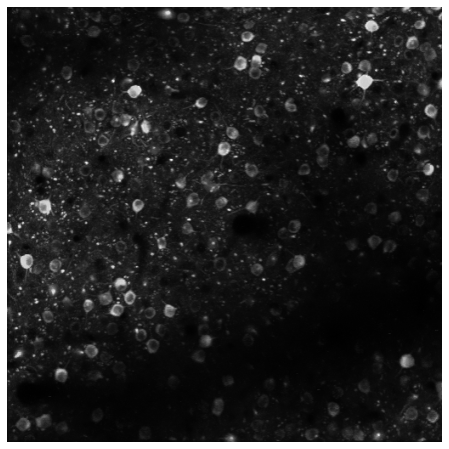

In [21]:
fig = plt.figure(figsize=(8,8))
plt.imshow(max_projection, cmap='gray')
plt.axis('off')

### 2.2 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [16]:
rois = data_set.get_roi_mask_array()

What is the shape of this array? How many neurons are in this experiment?

In [11]:
rois.shape

(174, 512, 512)

In [19]:
print(rois.shape[0])

174


Plot the masks for all the ROIs.

(-0.5, 511.5, 511.5, -0.5)

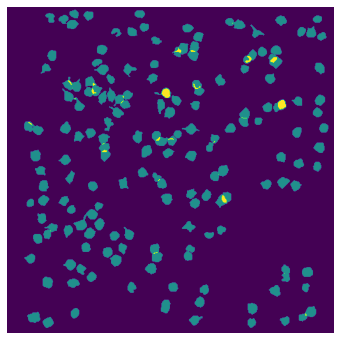

In [17]:
fig = plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))
plt.axis('off')

Let's look at the mask for one neuron - we can superimpose it on the max projection

In [25]:
#TODO Make this an outline? Hopefully we can point out that (a) exclude cells on the edge (motion correction) 
#(b) segmentation isn't perfect but pretty darn good 

(-0.5, 511.5, 511.5, -0.5)

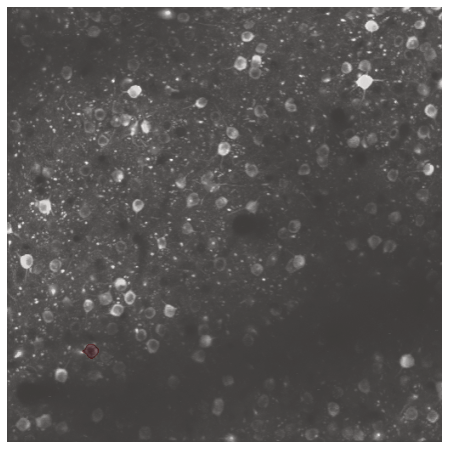

In [27]:
fig = plt.figure(figsize=(8,8))
plt.imshow(max_projection, cmap='gray')
plt.imshow(rois[122,:,:], cmap='Reds', alpha=0.25)
#TODO: make an outline
plt.axis('off')

### 2.3 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

In [26]:
ts,fluor = data_set.get_fluorescence_traces()

In [27]:
fluor.shape

(174, 113888)

In [28]:
_, np = data_set.get_neuropil_traces()

In [29]:
_,cor = data_set.get_corrected_fluorescence_traces()

Let's look at one cell, zooming in

(1900.0, 2200.0)

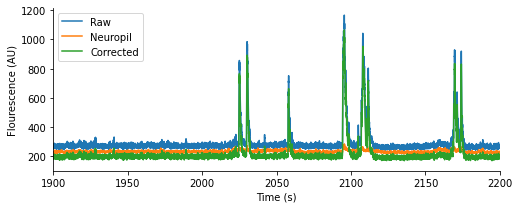

In [31]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, fluor[122,:], label="Raw")
plt.plot(ts, np[122,:], label="Neuropil")
plt.plot(ts, cor[122,:], label="Corrected")
plt.legend()
sns.despine()
plt.xlabel("Time (s)")
plt.ylabel("Flourescence (AU)")
plt.xlim(1900,2200)

In [ ]:
#TODO: I think we want to explain what these traces are. Key thing students probably won't work with them, but they help them understand how we process the data

The most relevant traces for us are the DFF traces. 

#TODO: explain the DFF calculation - maybe show example

Let's get the DFF traces

In [28]:
ts, dff = data_set.get_dff_traces()

In [33]:
dff.shape

(174, 113888)

Text(0, 0.5, 'DFF (%)')

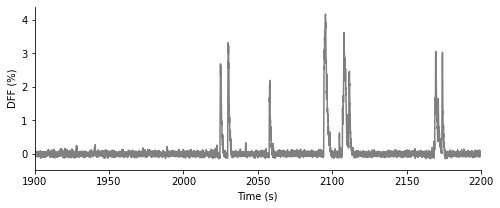

In [31]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, dff[122,:], color='gray')
sns.despine()
plt.xlabel("Time (s)")
plt.xlim(1900,2200)
plt.ylabel("DFF (%)")

Let's look at the DFF for the first neuron for the entire session

Text(0, 0.5, 'DFF (%)')

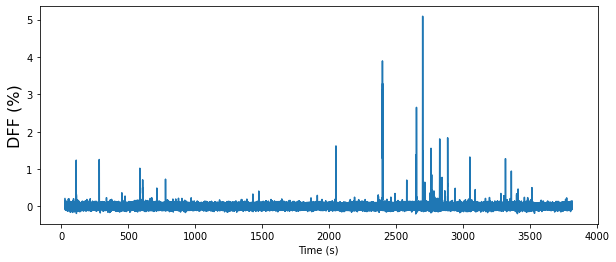

In [30]:
plt.figure(figsize=(10,4))

plt.plot(ts, dff[0,:])

plt.xlabel("Time (s)")
plt.ylabel("DFF (%)", fontsize=16)

Let's look at the first 50 neurons. We're going to plot the DFF for each neuron, and offset each neuron.

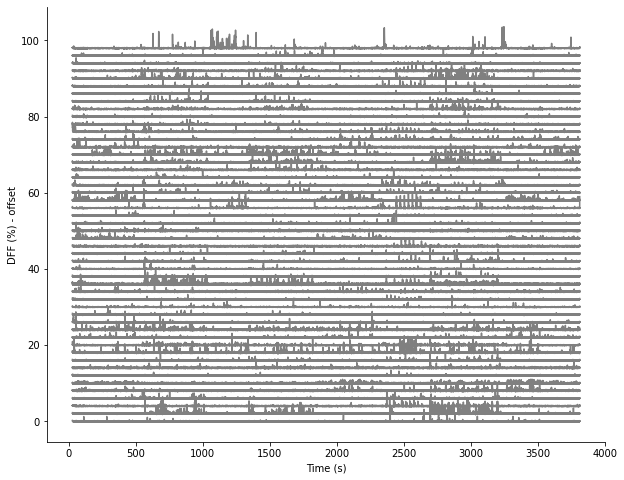

In [32]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(ts, dff[i,:]+(i*2), color='gray')
plt.xlabel("Time (s)")
plt.ylabel("DFF (%) - offset")
sns.despine()

It looks like different neurons are active at different times. Why might that be?

### 2.4 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The `stimulus epoch table` provides information of the "stimulus epochs" which are intervals of 5-20 minutes of a particular stimulus type (e.g. 5 minutes of natural movies or 10 minutes of drifting gratings). Within these epochs, there are many trials, and these are documented in the `stimulus table` (see section 2.6 below).


Get the stimulus epoch table for this session from data_set and print the table

In [35]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [36]:
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


What are these start and end values? These are the timepoints when each spoch starts and ends. These are provided in the units of 2p acquisition frames. So far we've been looking at the DFF traces relative to the timestamps (ts). These timestamps were calculated from the frame number and the imaging rate. ... TODO FINISH THIS

TODO: Maybe add a figure to explain the temporal alignment?

Let's overlay stimulus epochs onto our plot of the DFF traces.  

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">

We're going to use a useful python function called `enumerate` which returns both the index and value of items in a list. We'll make a list of the stimulus types and enumrate them

In [40]:
#live code?
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    print(c, stim_name)

0 static_gratings
1 natural_scenes
2 spontaneous
3 natural_movie_one


<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">

We'll also use a matplotlib function called `plt.axvspan` which allows us to shaed regions of the plot. This plots a rectangle that spans from xmin to xmax horizontally, and, by default, the whole y-axis vertically. (`axhspan` does the equivalent for the y axis.) You can use the `?` to find out more information about this function.

Let's put this together to add some shading to our plot to indicate each stimulus epoch during the session.

Text(0.5, 0, 'Acquisition frames')

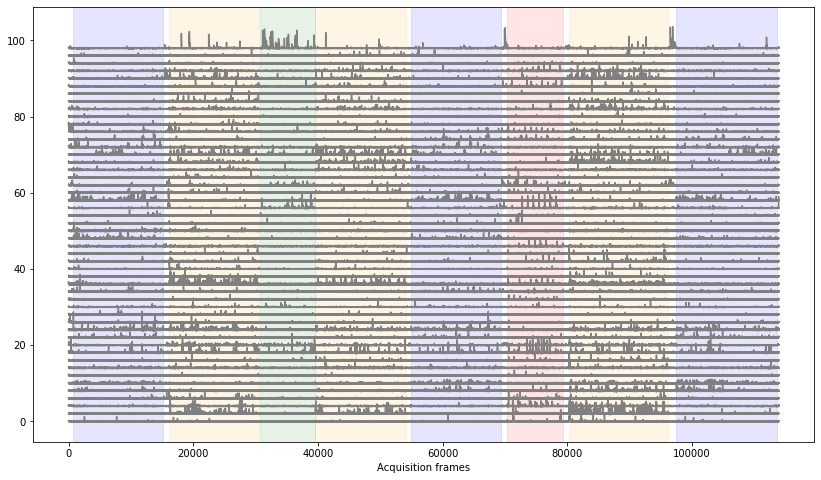

In [49]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Acquisition frames")

### 2.5 Running speed

The running speed of the animal on the rotating disk during the entire session.

In [45]:
dxcm, tsd = data_set.get_running_speed()

In [46]:
dxcm.shape

(113888,)

Notice that this has the same length as the dff traces. These running speeds have also been temporally aligned with the other data.

Plot the running speed. Label the units (they are cm/s)

Text(0.5, 0, 'Aquisition frames')

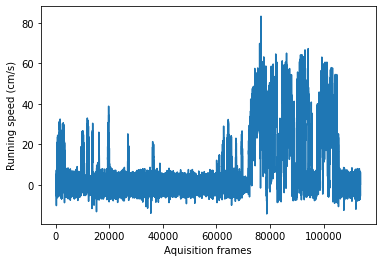

In [48]:
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")
plt.xlabel("Aquisition frames")

Add the running speed to the neural activity and stimulus epoch figure

Text(0.5, 0, 'Aquisition frames')

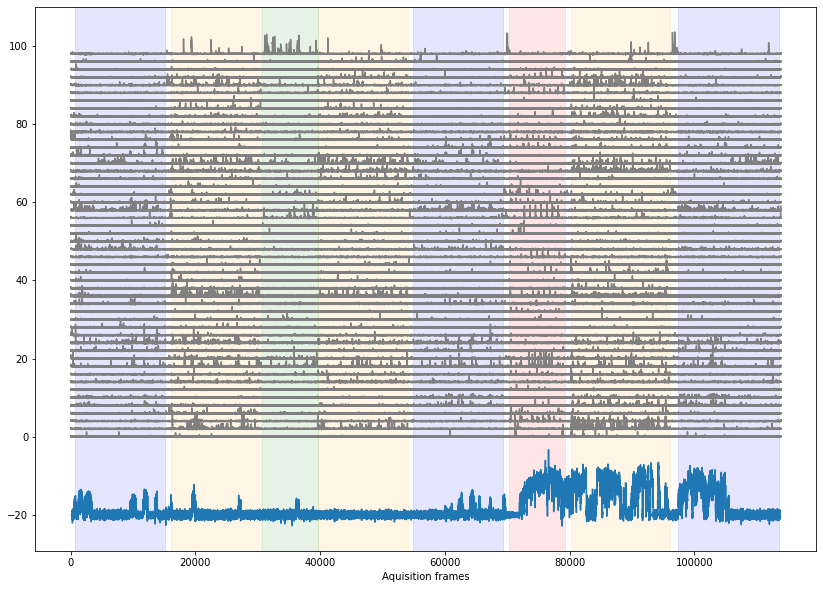

In [50]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#Add the running speed - we'll offset this below the traces
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Aquisition frames")

### Interesting things

There are some interesting neurons here.  Plot the dff trace for neuron 49 with the stimulus epochs, and running trace. Do you notice anything about when the neuron is active?

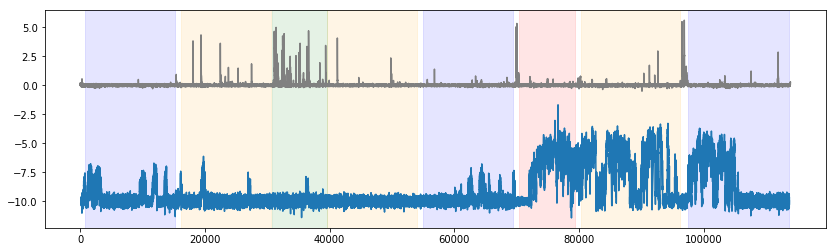

In [36]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[49,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

Make the same plot for neuron number 4 and then for neuron 35.  What do you notice about their activity?

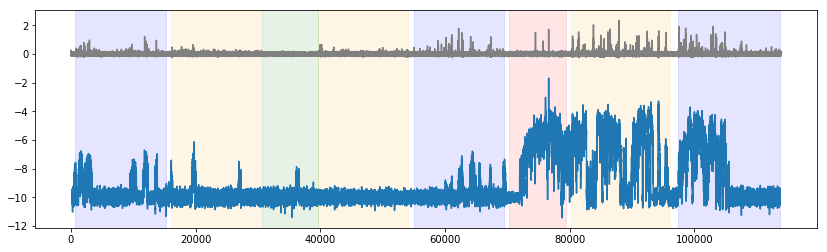

In [39]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[4,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

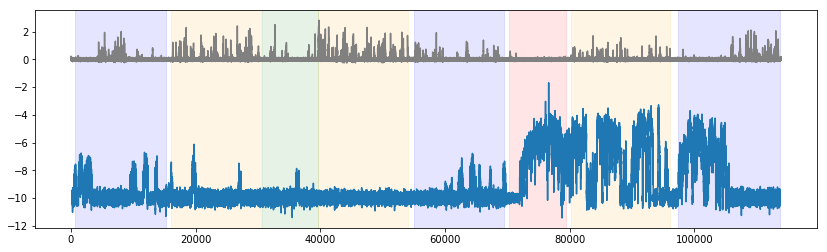

In [40]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[35,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

Already we can see that there is diversity in the activity of these neurons, even on just a very coarse level!

### 2.5b Extracted events
We have done "event extraction" on the DFF traces to estimate the firing events of the neurons a bit more precisely. We use a method developed by Sean Jewell and Daniella Witten called the L0 method. These events are not "spikes" but rather spiking events, and their amplitude is correlated with the neuron's firing rate.

These are not stored in the same NWB file, thus the way to access it is via the `boc` rather than through the data_set object.

In [51]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

In [52]:
events.shape

(174, 113888)

Notice that this array has the same shape as the array for DFF. What are these dimensions?

Let's plot the events and the dff trace for one neuron (say neuron 1) and zoom in a bit to see what's going on.

(20000.0, 21000.0)

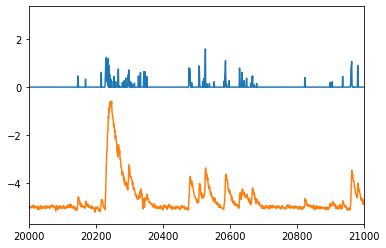

In [55]:
plt.plot(2*events[1,:])
plt.plot(dff[1,:]-5)
plt.xlim(20000,21000)

Text(0, 0.5, 'DFF')

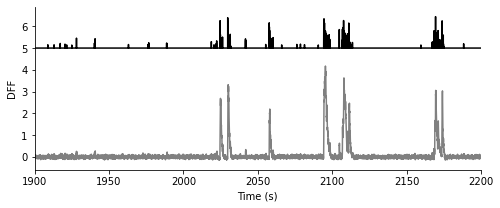

In [54]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, dff[122,:], color='gray')
plt.plot(ts, 2*events[122,:]+5, color='black')
sns.despine()
plt.xlabel("Time (s)")
plt.xlim(1900,2200)
plt.ylabel("DFF")

Remake our plot of neural activty, stimulus, and running using events

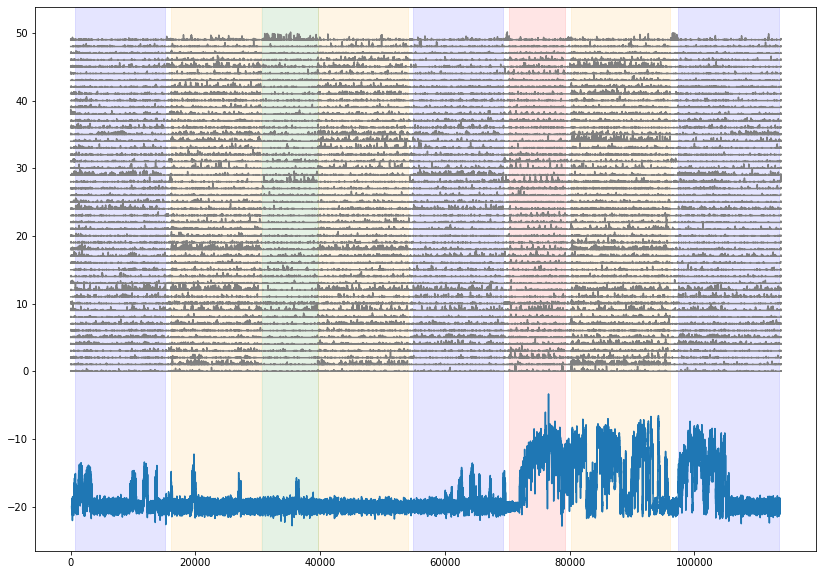

In [62]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot((events[i,:]+i), color='gray') 
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.6 Stimulus Table
We saw the spimulus epoch table above in section 2.4. For each stimulus type there is a stimulus table with information about the condition and timing of each trial. We can access this using `get_stimulus_table`.

In [64]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

Let's look at this table. What are the columns? What are the rows?

In [65]:
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


The column called `frame` indicates which image was shown by references the "stimulus template" (see section 2.7 below). 

How many different images were shown? How many times were they each shown?

In [66]:
#live code/exercise
natural_scene_table.frame.unique() #TODO: has unique been introduced yet?

array([ 81,  33,  76,  13,  56,  30,  44,  93,  65,  60,  77, 100,  47,
        99,  58,  36,  71,  14,  61,  72,  52,  82,  20,  92, 116,  98,
        78,  16,  42,  23,   7,  27,  62,  21,  51,  70,  45,  50,  39,
        41, 105,  86,  26,  55,  54,  38, 106,  88,  96,  49,   5,   0,
        15, 104,  32,  29,  57,  91,  46, 112,  53,   6,   8,  10,  64,
        87,  63,  19, 103,  37,  84,  67,  48,  34,  31,  22,  28,  59,
        12,  97,   1, 110, 102,  80,  18,  24,  83,  74,  25,  94,  73,
       115,  89,  -1,  17,  43,  75,  68, 111,  90, 107, 114,  11,  85,
         9,  95,   3, 113,  79,  35, 108, 109,   2,   4,  69, 117,  40,
        66, 101])

In [68]:
len(natural_scene_table.frame.unique())

119

Text(0, 0.5, 'Number of trials')

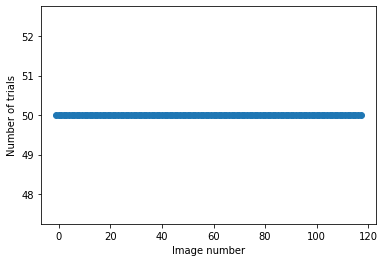

In [88]:
num_trials = np.empty((len(natural_scene_table.frame.unique()),2))
num_trials[:,0] = natural_scene_table.frame.unique()
for i,v in enumerate(natural_scene_table.frame.unique()):
    num_trials[i,1] = len(natural_scene_table[natural_scene_table.frame==v])
plt.plot(num_trials[:,0], num_trials[:,1], 'o')
plt.xlabel("Image number")
plt.ylabel("Number of trials")

Bonus question: One of the values we see is -1. What do you think this mean?

### Exercise: what is the duration of each trial? Is there any inter-trial interval (i.e. time between trials)

In [91]:
(natural_scene_table.end - natural_scene_table.start).mean()

7.028067226890756

In [92]:
7/30.

0.23333333333333334

Get the stimulus table for `static gratings`. Print the top of this dataframe. This looks a little different from the last one, why is that? What are the parameters for this stimulus?

In [54]:
static_gratings_table = data_set.get_stimulus_table('static_gratings')

In [55]:
static_gratings_table.head()

,orientation,spatial_frequency,phase,start,end
0,90.0,0.04,0.50,747,754
1,150.0,0.04,0.50,754,761
2,30.0,0.02,0.00,762,769
3,0.0,0.32,0.50,769,776
4,150.0,0.16,0.75,777,784


### Exercise: How many unique orientations and spatial_frequencies were used? How many combinations are there? How many trials of each combination?

### 2.7 Stimulus Template

The images and movies presented during the session are also included in the NWB file as the `stimulus template`. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [93]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [94]:
natural_scene_template.shape

(118, 918, 1174)

discussion: What is the first dimension of this array?

Plot some of these images to see what they are

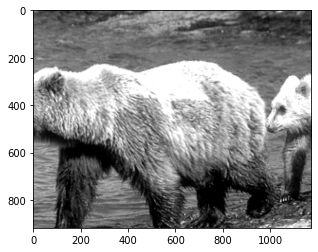

In [95]:
scene_number = 0
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

Look at the scene presented for the first trial

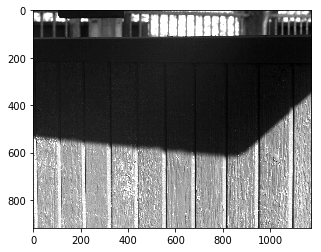

In [58]:
scene_number = natural_scene_table.frame.loc[0]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

Plot the time when this image is presented overlayed on the activity the 50 neurons

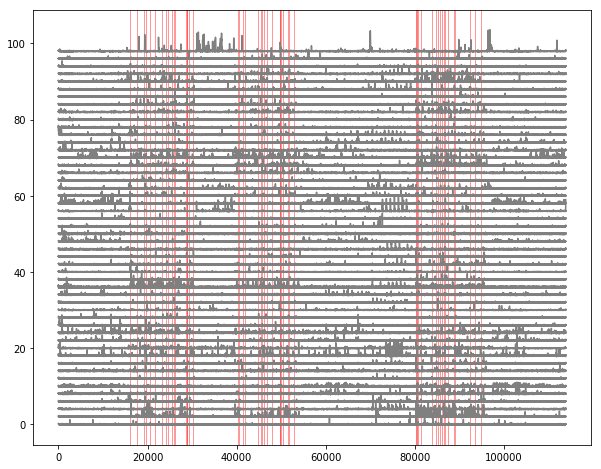

In [59]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

### 2.8 Metadata
This includes metadata about the experiment, some of which we used to select this experiment, some of which is only included here.

In [60]:
data_set.get_metadata()

{'sex': 'male',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 501559087,
 'experiment_container_id': 511510736,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': 'three_session_B',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'cre_line': 'Cux2-CreERT2/wt',
 'imaging_depth_um': 175,
 'age_days': 104,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

Metadata includes: age, sex, device & device_name, genotype, start_time.  Note: start_time is not the time the experiment was collected, but rather the time the NWB file was created.  TODO: can we check that this is true?

# 2.9 Cell ids and indices

Each cell in the dataset has a unique id, called the cell specimen id. To find the cells in this session, get the cell specimen ids. This id can be used to find experiments/session - as we'll do later today.

In [61]:
cell_ids = data_set.get_cell_specimen_ids()

In [62]:
cell_ids

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

Within each individual session, a cell id is associated with an index. This index maps into the dff of event traces.  Pick one cell id from the list above and find the index for that cell. Look for the cell specimen indices.

In [63]:
data_set.get_cell_specimen_indices([517473110])

[110]

## I propose removing 2.10 and 3 for TReND?

# 2.10 Cell Specimen Table

For every cell in the entire observatory dataset, there are precomputed metrics for the different stimuli. These metrics can be useful for identifying neurons you want to use for further analysis. 

In [21]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [23]:
cell_specimens.shape

(61371, 60)

In [22]:
cell_specimens.head()

,p_run_mod_sg,tlr1_id,image_sel_ns,tlr1_name,g_dsi_dg,p_ns,specimen_id,p_dg,time_to_peak_sg,pref_dir_dg,...,peak_dff_ns,reliability_nm2,all_stim,run_mod_sg,pref_sf_sg,sfdi_sg,g_osi_sg,g_osi_dg,reliability_nm3,donor_full_genotype
0,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,...,NaN,0.099343,False,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
1,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.824858,NaN,502185555,2.690800e-15,NaN,0.0,...,NaN,NaN,False,NaN,NaN,NaN,NaN,0.901542,0.026367,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
2,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.812462,NaN,502185555,3.070093e-02,NaN,180.0,...,NaN,0.030118,False,NaN,NaN,NaN,NaN,0.894923,0.040158,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
3,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.078742,NaN,502185555,1.245296e-01,NaN,NaN,...,NaN,0.041259,False,NaN,NaN,NaN,NaN,0.109241,0.022241,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
4,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,...,NaN,0.026227,False,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...


In [66]:
cell_specimens.keys()

Index(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg',
       'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg',
       'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns',
       'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg',
       'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg',
       'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a',
       'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2',
       'reliability_nm3', 'reliability_ns', 'reliability_sg',
       'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn',
       'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn',
       'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg',
       'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg',
       'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1

Find the mean g_osi_dg for the neurons in the experiment container you've chosen

In [24]:
cell_specimens[cell_specimens.experiment_container_id==experiment_container_id].g_osi_dg.mean()

0.5408688129625275

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 3. (BONUS!) Accessing calcium movies.</h2>

If you accessing the data on AWS, you can find the files for the calcium data (more precisely, the motion corrected calcium movies).  Here is an example piece of code that shows the beginning of the experiment we've been looking at.

</div>

In [70]:
import h5py
from matplotlib import animation, rc
from IPython.display import HTML

In [71]:
raw_data_dir = '/data/allen-brain-observatory/visual-coding-2p/ophys_movies/'

In [72]:
def get_raw_data_path(session_id):
    return os.path.join(raw_data_dir, 'ophys_experiment_'+str(session_id)+'.h5')

exp_path = get_raw_data_path(session_id)

In [73]:
raw_data = h5py.File(exp_path, 'r')
raw_data['data']

<HDF5 dataset "data": shape (113888, 512, 512), type "<u2">

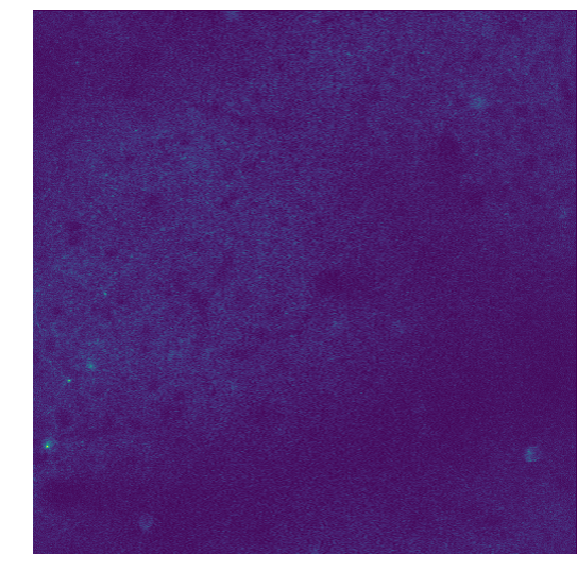

In [74]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(raw_data['data'][0])
ax.axis('off')

def init():
    im.set_data(raw_data['data'][0])
    return (im,)

def animate(i):
    im.set_data(raw_data['data'][i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1000./30, blit=True)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1>Part 4: Compute the tuning curve for the drifting grating stimulus</h1>

We are going to look at the response of a single neuron, identified by its cell specimen id.

</div>

In [3]:
cell_id = 541513979

First get the dataset for the **experiment session** that this cell is in that has the drifting grating stimulus

In [4]:
#Live coding
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])
session_id = exps[0]['id']
data_set = boc.get_ophys_experiment_data(session_id)

In [ ]:
#What are the things we need? Activity trace (events? dff?) And stimulus table/

Get the DF/F trace for this neuron. For now we just want to consider this one neuron.

In [15]:
#Exercise: 
#Get dff traces for all neurons. How many neurons is it?
timestamps, dff = data_set.get_dff_traces()

In [16]:
dff.shape

(290, 115741)

In [ ]:
#Exercise:
#find the index for the neuron we're looking for

In [12]:
cell_index = data_set.get_cell_specimen_indices([cell_id])[0]
print(cell_index)

6


In [10]:
#Exercise:
#extract the trace for our chosen neuron called dff_trace

In [17]:
dff_trace = dff[cell_index,:]

In [14]:
#This is an alternate solution that might be useful or might be useful
timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_id])
dff_trace = dff[0,:] #this is what I don't like about it, it's an awkward shape

Let's plot the DF/F trace of our neuron to see what it looks like.

Text(0, 0.5, 'DFF')

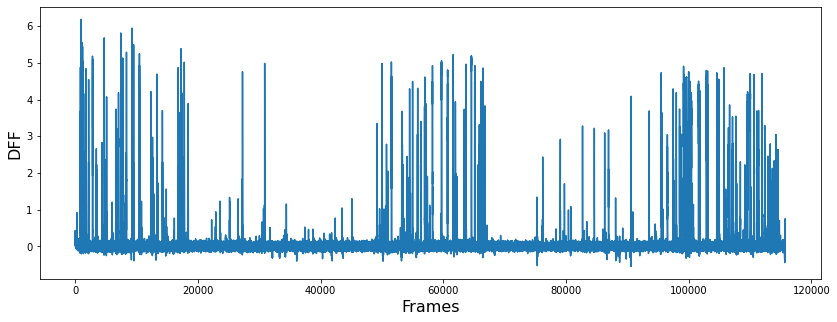

In [18]:
plt.figure(figsize=(14,5))
plt.plot(dff_trace)
plt.xlabel("Frames", fontsize=16)
plt.ylabel("DFF", fontsize=16)

Get the stimulus table for the drifting grating stimulus

In [19]:
stim_table = data_set.get_stimulus_table('drifting_gratings')

Let's look at the stimulus table to see what information there is. 

In [20]:
stim_table.head()

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,45.0,0.0,736,796
1,15.0,90.0,0.0,826,886
2,1.0,270.0,0.0,917,977
3,NaN,NaN,1.0,1007,1067
4,4.0,90.0,0.0,1098,1158


In [21]:
#Exercise:
#What are the orientations and temporal frequencies that are used? 

In [24]:
np.sort(stim_table.orientation.unique())

array([  0.,  45.,  90., 135., 180., 225., 270., 315.,  nan],
      dtype=float32)

In [25]:
np.sort(stim_table.temporal_frequency.unique())

array([ 1.,  2.,  4.,  8., 15., nan], dtype=float32)

What's the duration of each trial? How much time is between trials?

To look at the neuron's response to a given trial, let's plot the DF/F of the cell during that trial.  

For visualization purposes, let's pad the plot with ~ 1 second of the DF/F trace preceding the grating presentation and ~ 1 second after the presentation. (1 second = 30 frames.) We'll plot the response to the first trial. Print the grating direction and temporal frequency as well.

Direction:  45.0
Temporal frequency:  1.0


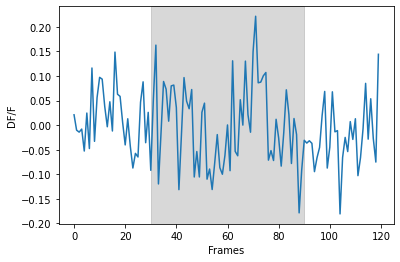

In [26]:
plt.plot(dff_trace[stim_table.start[0]-30:stim_table.end[0]+30])


plt.axvspan(30,90, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
plt.ylabel("DF/F")
plt.xlabel("Frames")

print("Direction: ", stim_table.orientation[0])
print("Temporal frequency: ", stim_table.temporal_frequency[0])

Quantify this response by calculating the mean DF/F during the grating presentation. Only take the mean during the presentation.

In [34]:
dff_trace[stim_table.start[0]:stim_table.end[0]].mean()

-0.0020014683


Repeat this (the plot and the quantification) for the next grating stimulus

Direction:  90.0
Temporal frequency:  15.0


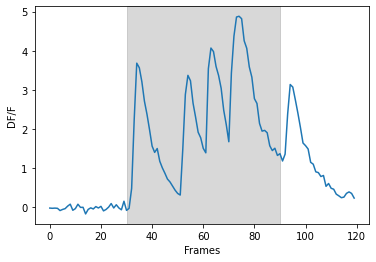

In [27]:
plt.plot(dff_trace[stim_table.start[1]-30:stim_table.end[1]+30])

plt.axvspan(30,90, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
plt.ylabel("DF/F")
plt.xlabel("Frames")

print("Direction: ", stim_table.orientation[1])
print("Temporal frequency: ", stim_table.temporal_frequency[1])

In [28]:
dff_trace[stim_table.start[1]:stim_table.end[1]].mean()

2.292613

#Discuss

To compute the tuning curve of this neuron, we need to compute this mean response to each trial of the stimulus. How many trials are there in total?

In [29]:
len(stim_table)

628

Let's do this systematically. We'll create a pandas DataFrame to hold the response of our neuron to each trial. This DataFrame needs to have the same number of trials as the stimulus table and (for now) just one column.

In [34]:
response = pd.DataFrame(columns=('orientation','temporal_frequency','trial_response'), index=stim_table.index.values) 

In [35]:
response['orientation'] = stim_table.orientation
response['temporal_frequency'] = stim_table.temporal_frequency

In [39]:
pd.options.mode.copy_on_write = True

In [42]:
for ind,row_stim in stim_table.iterrows():
    response.loc[ind, 'trial_response'] = dff_trace[int(row_stim.start):int(row_stim.end)].mean()

Confirm that the first two trials give us the same result as we saw when we computed it individually

In [44]:
response.head()

,orientation,temporal_frequency,trial_response
0,45.0,1.0,-0.002001
1,90.0,15.0,2.292613
2,270.0,1.0,4.739945
3,NaN,NaN,0.04653
4,90.0,4.0,3.047691


Let's look at these response. Plot the trial_response for all trials.

Text(0, 0.5, 'Mean DFF (%)')

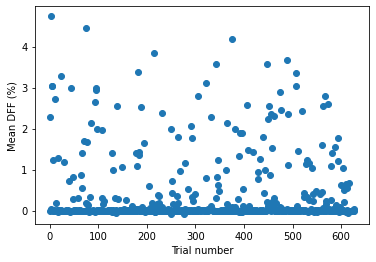

In [46]:
plt.plot(response.trial_response, 'o')
plt.xlabel("Trial number")
plt.ylabel("Mean DFF (%)")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
If we only care about one stimulus parameter, we can quickly compare the response to that parameter, say the direction. Here we will plot each grating response as a function of the grating orientation.
</div>

Text(0, 0.5, 'Mean DF/F')

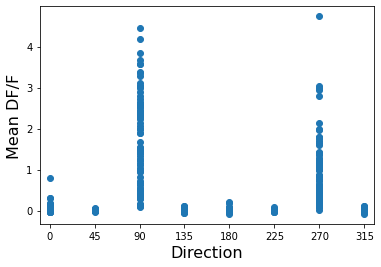

In [54]:
plt.plot(response.orientation.values, response.trial_response.values, 'o')
plt.xticks(range(0,360,45))
plt.xlim(-10,325)
plt.xlabel("Direction", fontsize=16)
plt.ylabel("Mean DF/F", fontsize=16)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 2:** Repeat this for the temporal frequency parameter </div>

Text(0, 0.5, 'Mean DF/F')

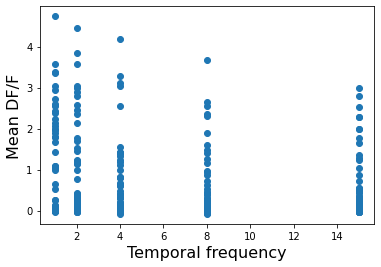

In [56]:
plt.plot(response.temporal_frequency.values, response.trial_response.values, 'o')
plt.xlabel("Temporal frequency", fontsize=16)
plt.ylabel("Mean DF/F", fontsize=16)

In [ ]:
#Discuss: lots of variability across trials.

Let's compute the mean response for each orientation by averaging all of the trials for a given orientation together. To do this, you need to know what all the possible orientation values are.  Find the <b>unique</b> values that are not NaNs (eg. values that are <b>finite</b>) from either the stimulus table or the response dataframe you just made. Sort these in ascending order.

In [49]:
all_ori = np.sort(stim_table.orientation.unique())
orivals = all_ori[np.isfinite(all_ori)]
print(orivals)

[  0.  45.  90. 135. 180. 225. 270. 315.]


In [50]:
#alternate method
np.sort(stim_table.orientation.dropna().unique())

array([  0.,  45.,  90., 135., 180., 225., 270., 315.], dtype=float32)

Pandas allows us to select rows of the dataframe on a condition. For example, let's get all the trials when the orientation is 0

In [57]:
response[response.orientation==0]

,orientation,temporal_frequency,trial_response
9,0.0,4.0,0.015196
12,0.0,2.0,0.188865
13,0.0,1.0,-0.003244
17,0.0,15.0,-0.025243
22,0.0,1.0,-0.011316
...,...,...,...
584,0.0,4.0,-0.007417
585,0.0,2.0,0.008518
589,0.0,1.0,0.126371
611,0.0,4.0,-0.032946


<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 3:** Compute and plot the mean response as a function of orientation

Make an array of length 8 to hold your results. Iterate over the orientation values, select the trials that have that orientation, and average the responses together.
</div>

In [58]:
#live coding
tuning = np.empty((8))
for i, ori in enumerate(orivals):
    trials = response[response.orientation==ori]
    tuning[i] = trials.trial_response.mean()
    #tuning[i] = response[response.orientation==ori].trial_response.mean()

Text(0, 0.5, 'Mean response (DFF)')

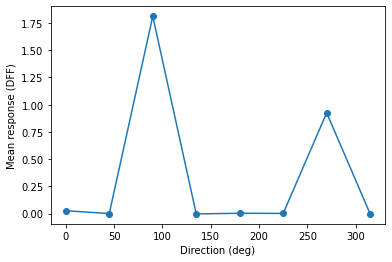

In [60]:
#live coding
plt.plot(orivals,tuning, 'o-')
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 4:** Compute and plot the mean response as a function of temporal frequency for all orientations. </div>

In [51]:
tfvals = np.sort(stim_table.temporal_frequency.unique())
tfvals = tfvals[np.isfinite(tfvals)]
print(tfvals)

[ 1.  2.  4.  8. 15.]


(Side note: what are the trials when the orientation and temporal frequency is NaN? These are the blank sweeps)

In [62]:
tuning_tf = np.empty((len(tfvals)))
for i,tf in enumerate(tfvals):
    trials = response[response.temporal_frequency==tf]
    tuning_tf[i] = trials.trial_response.mean()

Text(0, 0.5, 'Mean response (DFF)')

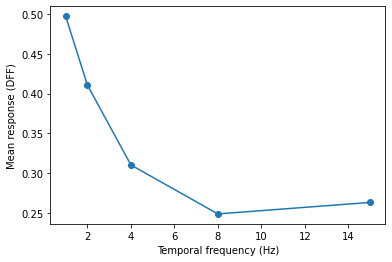

In [64]:
plt.plot(tfvals, tuning_tf, 'o-')
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 5:** Add errorbars to the above tuning curves. They can be standard deviation or standard error or the mean.  (Hint: `plt.errorbar` might be a useful function).
</div>

In [65]:
tuning_std = np.empty((8))
for i, ori in enumerate(orivals):
    trials = response[response.orientation==ori]
    tuning_std[i] = trials.trial_response.std()

Text(0, 0.5, 'Mean response (DFF)')

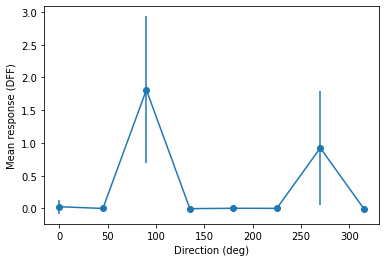

In [68]:
plt.errorbar(orivals, tuning, yerr=tuning_std, fmt='o-')
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
**Exercise 6:** Add a black line showing the mean response to the blank sweep (Hint 1: orientation and temporal frequency are NaN for the blank sweep condition.  Hint 2: plt.axhline might be a useful function).  </div>

In [70]:
blank_trials = response[np.isnan(response.orientation)]
blank_mean = blank_trials.trial_response.mean()
print(blank_mean)

0.019221893672285408


Text(0, 0.5, 'Mean response (DFF)')

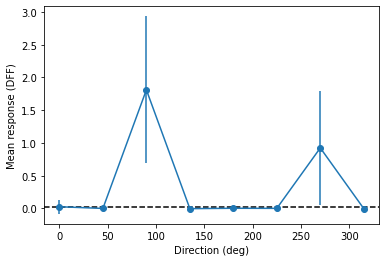

In [71]:
plt.errorbar(orivals, tuning, yerr=tuning_std, fmt='o-')
plt.axhline(y=blank_mean, ls='--', color='k')

plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 7:** So far we've been looking at each dimension separately, e.g. looking at direction tuning across all temporal frequencies. Now let's compute and plot the direction tuning curve separately for each of the 5 temporal frequencies. 
<p> What shape array do we need to hold this?
</div>

In [72]:
tuning_array = np.empty((8,5))
for i,tf in enumerate(tfvals):
    for j,ori in enumerate(orivals):
        trials = response[(response.orientation==ori)&(response.temporal_frequency==tf)]
        tuning_array[j,i] = trials.trial_response.mean()

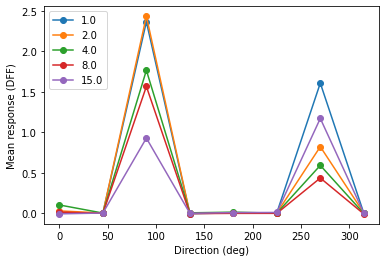

In [76]:
for i in range(5):
    plt.plot(orivals, tuning_array[:,i], 'o-', label=tfvals[i])
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")
plt.legend()

Plot the response for each direction separately

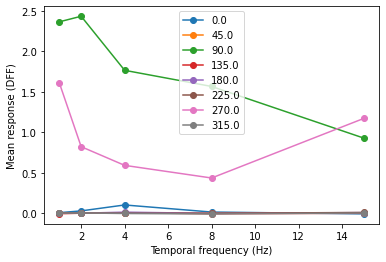

In [77]:
for i in range(8):
    plt.plot(tfvals, tuning_array[i,:], 'o-', label=orivals[i])
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Mean response (DFF)")
plt.legend()

Plot a heatmap of the responses to all conditions

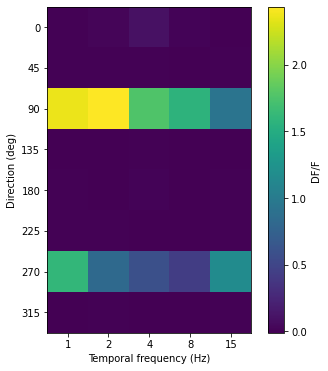

In [78]:
fig = plt.figure(figsize=(6,6))
plt.imshow(tuning_array)
plt.xticks(range(5), tfvals.astype(int))
plt.yticks(range(8), orivals.astype(int))
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Direction (deg)")
cbar = plt.colorbar()
cbar.set_label("DF/F")

In [79]:
#Make this a z-score?

In [ ]:
#This is where I've stopped

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 5: Compute and compare the tuning for all cells in this experiment</h1>

Now we are going to compute the same tuning curve for all of the cells in your experiment, and compare how similar they are with each other by computing the signal correlation.
</div>

Get the DF/F traces for all of neurons in the dataset. Previously we only got one trace, now we want them all.

In [37]:
timestamps, dff = data_set.get_dff_traces()

How many neurons are in the dataset? This will be a useful variable later. Call it **numbercells**

In [38]:
numbercells = dff.shape[0]
print(numbercells)

290


<div style="background: ##DFF0D8; border-radius: 3px; padding: 10px;">

<p>There are some data objects available through the SDK that do some of the analysis for us. For instance, there is a dataframe called <b>mean_sweep_response</b> that has the mean DF/F for each stimulus trial for all cells. This is essentially what we calculated above for just one cell, extrapolated to all the cells. There are some differences in how it's done - ask me if you are super interested in them.
</div>

To access the analysis objects we need to import the analysis for this stimulus and implement that for this data set.

In [48]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

In [110]:
dg = DriftingGratings(data_set)

Get the mean sweep response from the analysis object. What is its shape?

In [111]:
mean_sweep_response = dg.mean_sweep_response

In [112]:
mean_sweep_response.shape

(628, 291)

What are the columns of this dataframe?

In [61]:
mean_sweep_response.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '281', '282', '283', '284', '285', '286', '287', '288', '289', 'dx'],
      dtype='object', length=291)

The keys for the dataframe and the <i>cell index</i> for each cell. And the last column of this dataframe is not a cell, but the <i>mean running speed</i> for each trial, 'dx'. This might be useful for some analyses comparing running to stationary, or it might not be relevant to a particular question. Let's look at it briefly. Plot the running speed column of the dataframe.

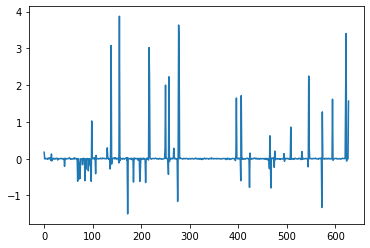

In [71]:
plt.plot(mean_sweep_response.dx)

For our analysis today we want to ignore the running speed, so drop the column from the dataframe.

In [124]:
mean_sweep_response.drop(columns=['dx'], inplace=True)

In [125]:
mean_sweep_response.shape

(628, 290)

Write a function to create an array with dimensions (8,5,numbercells) with the mean response to each condition for each cell in your experiment.

In [66]:
def compute_tuning_all_cells(mean_sweep_response, stim_table):
    numbercells = mean_sweep_response.shape[1]
    response = np.empty((8,5,numbercells))
    for i,ori in enumerate(orivals):
        for j,tf in enumerate(tfvals):
            subset = mean_sweep_response[(stim_table.orientation==ori)&(stim_table.temporal_frequency==tf)]
            response[i,j,:] = subset.mean(axis=0).values
    return response

In [80]:
response = compute_tuning_all_cells(mean_sweep_response, stim_table)

Confirm your function by plotting the mean response for the cell that you used above. You need to find the cell index for your cell. Use data_set.get_cell_specimen_indices to find the index for that cell.

In [81]:
cell_index = data_set.get_cell_specimen_indices(cell_specimen_ids=[cell_id])[0]
print(cell_index)

6


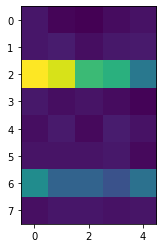

In [82]:
plt.imshow(response[:,:,cell_index])

Now we can compute the signal correlations, comparing the tuning curves of all the neurons.

In [87]:
signal_correlations = np.empty((numbercells, numbercells))
signal_correlations[:] = np.NaN
for i in range(numbercells):
    for j in range(numbercells):
        if j>i:
            r,p = st.pearsonr(response[:,:,i].flatten(), response[:,:,j].flatten())
            signal_correlations[i,j] = r

What is the mean signal correlations across all the cells in your experiment?

In [88]:
np.nanmean(signal_correlations)

0.1504615605598911

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 6: Correlations of movie responses </h1>

Drifting gratings isn't the only stimulsu presented during this session. We will compute the correlation of the responses to natural movie three across neurons to compare with the drifting gratings.
</div>

Find what other stimuli were presented during this session.

In [121]:
data_set.get_stimulus_epoch_table()

,stimulus,start,end
0,drifting_gratings,736,18810
1,natural_movie_three,19746,37850
2,natural_movie_one,38756,47807
3,drifting_gratings,48712,66786
4,spontaneous,66936,75868
5,natural_movie_three,75869,93972
6,drifting_gratings,94878,115485


The DF/F traces we have are for the entire session, so we already have that. But we need the stimulus table for the natural movie.

In [131]:
stim_table_nm3 = data_set.get_stimulus_table('natural_movie_three')

In [132]:
stim_table_nm3.head()

,frame,start,end,repeat
0,0,19746,19747,0
1,1,19747,19748,0
2,2,19748,19749,0
3,3,19749,19750,0
4,4,19750,19751,0


How many frames are in the natural movie? How many repeats? How long does each frame (typically) last? (why might it vary from this?) 

In [133]:
num_frames = len(stim_table_nm3.frame.unique())
print(num_frames)

3600


In [134]:
num_repeats = len(stim_table_nm3.repeat.unique())
print(num_repeats)

10


Out of curiosity, let's look at the first and the last frame of the movie. Get the stimulus template for this movie and plot the first and the last frame of the movie.

In [127]:
template = data_set.get_stimulus_template('natural_movie_three')

In [128]:
template.shape

(3600, 304, 608)

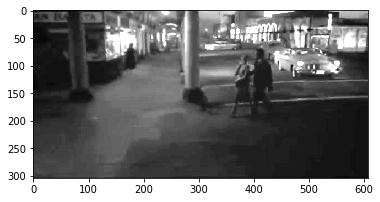

In [129]:
plt.imshow(template[0,:,:], cmap='gray')

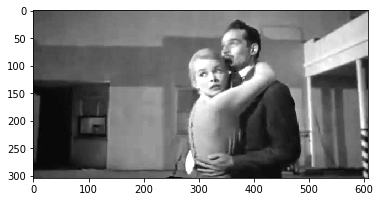

In [130]:
plt.imshow(template[-1,:,:], cmap='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Compute the mean response for each neuron to the movie.  

</div>

In [135]:
response_nm3 = np.empty((numbercells, num_frames))
temp = np.empty((numbercells, num_frames, num_repeats))
for i in range(num_repeats):
    start_time = int(stim_table_nm3[(stim_table_nm3.frame==0)&(stim_table_nm3.repeat==i)].start)
    temp[:,:,i] = dff[:, start_time:start_time+num_frames]
response_nm3 = temp.mean(axis=2)

Plot the mean movie response for the cell you analyzed above

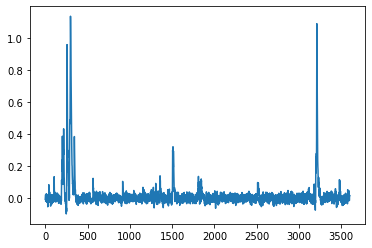

In [136]:
plt.plot(response_nm3[cell_index,:])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Compute the correlation of mean movie response for all neurons

</div>


In [161]:
movie_correlations = np.empty((numbercells, numbercells))
movie_correlations[:] = np.NaN
for i in range(numbercells):
    for j in range(numbercells):
        if j>i:
            r,p = st.pearsonr(response_nm3[i,:], response_nm3[j,:])
            movie_correlations[i,j] = r

What is the mean correlations across all the cells in your experiment?

In [138]:
np.nanmean(movie_correlations)

0.07977039598639278

Which neuron has the highest correlation with your neuron for the natural movie? Is it the same neuron as for the drifting gratings? Plot both of their movie responses.

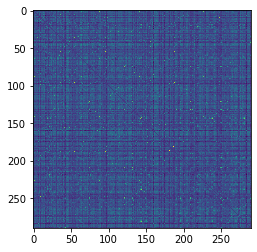

In [139]:
movie_correlations[np.isnan(movie_correlations)]=0

test = movie_correlations+movie_correlations.T
plt.imshow(test)

In [140]:
print(test[6,:].argmax())

56


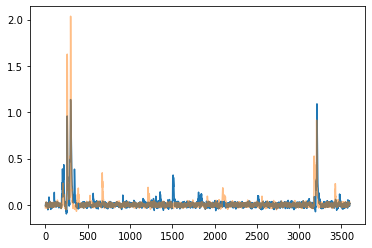

In [146]:
plt.plot(response_nm3[6,:])
plt.plot(response_nm3[56,:], alpha=0.5)

Do these cells have similar responses to the drifting grating stimulus too?

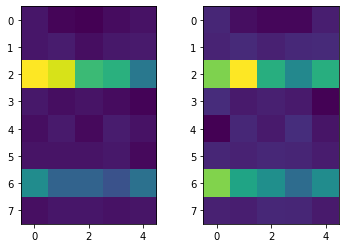

In [143]:
plt.subplot(121)
plt.imshow(response[:,:,6])
plt.subplot(122)
plt.imshow(response[:,:,56])

In [129]:
print(signal_correlations[6,56])

0.9383054680165922


In [144]:
print(movie_correlations[6,56])

0.7509293926390077


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Are the signal correlations of the movie and drifting grating responses correlated?
</div>

In [ ]:
movie_correlations = np.empty((numbercells, numbercells))
movie_correlations[:] = np.NaN
for i in range(numbercells):
    for j in range(numbercells):
        if j>i:
            r,p = st.pearsonr(response_nm3[i,:], response_nm3[j,:])
            movie_correlations[i,j] = r

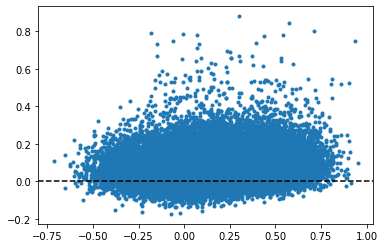

In [169]:
plt.plot(signal_correlations.flatten(), movie_correlations.flatten(), '.')
plt.axhline(y=0, ls='--', color='k')

In [170]:
r,p = st.pearsonr(signal_correlations[np.isfinite(signal_correlations)], 
           movie_correlations[np.isfinite(movie_correlations)])
print(r)

0.14038219504595337


<div style="background: #fad7e4; border-radius: 3px; padding: 10px;">
Challenge: Does this relationship depend on cell type or area?
</div>